In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('dataset/Coffee_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14


In [3]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Konversi kolom waktu
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = pd.to_timedelta(df['Time'].astype(str))

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,0 days 10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:48:14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   hour_of_day  3547 non-null   int64          
 1   cash_type    3547 non-null   object         
 2   money        3547 non-null   float64        
 3   coffee_name  3547 non-null   object         
 4   Time_of_Day  3547 non-null   object         
 5   Weekday      3547 non-null   object         
 6   Month_name   3547 non-null   object         
 7   Weekdaysort  3547 non-null   int64          
 8   Monthsort    3547 non-null   int64          
 9   Date         3547 non-null   datetime64[ns] 
 10  Time         3547 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5), timedelta64[ns](1)
memory usage: 304.9+ KB


In [8]:
numerik = df.select_dtypes(include=['number']).columns.tolist()
kategori = df.select_dtypes(exclude=['number']).columns.tolist()

df[kategori].head()

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date
0,card,Latte,Morning,Fri,Mar,2024-03-01
1,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
2,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01
3,card,Americano,Afternoon,Fri,Mar,2024-03-01
4,card,Latte,Afternoon,Fri,Mar,2024-03-01


In [9]:
df[numerik].head()

,hour_of_day,money,Weekdaysort,Monthsort,Time
0,10,38.7,5,3,0 days 10:15:50
1,12,38.7,5,3,0 days 12:19:22
2,12,38.7,5,3,0 days 12:20:18
3,13,28.9,5,3,0 days 13:46:33
4,13,38.7,5,3,0 days 13:48:14


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop_duplicates().head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,0 days 10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:48:14


In [12]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547.000000,3547.000000,3547.000000,3547,3547
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368,0 days 14:40:35.531716943
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00,0 days 06:50:04
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00,0 days 10:57:06
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00,0 days 14:31:28
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00,0 days 18:11:31
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00,0 days 22:59:18
std,4.234010,4.877754,1.971501,3.500754,NaN,0 days 04:13:10.420693453


In [13]:
df.describe(include='object')

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name
count,3547,3547,3547,3547,3547
unique,1,8,3,7,12
top,card,Americano with Milk,Afternoon,Tue,Mar
freq,3547,809,1205,572,494


In [14]:
df.isna().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [15]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()
df[['year', 'month', 'day', 'day_name']].head()

,year,month,day,day_name
0,2024,3,1,Friday
1,2024,3,1,Friday
2,2024,3,1,Friday
3,2024,3,1,Friday
4,2024,3,1,Friday


In [16]:
Q1 = df[numerik].quantile(0.25)
Q3 = df[numerik].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[numerik] < lower_bound) | (df[numerik] > upper_bound)).any(axis=1)]
print("Data Outlier: ", df_outlier.shape[0], "baris")

Data Outlier:  0 baris


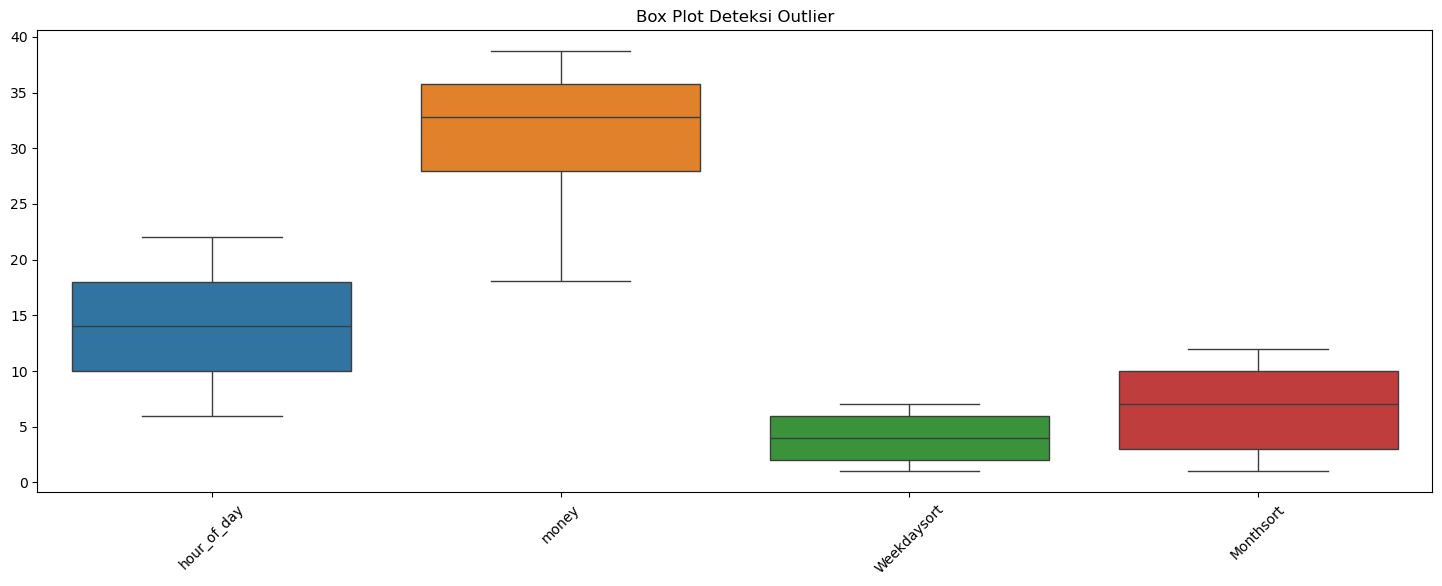

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numerik])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

## Data Manipulation

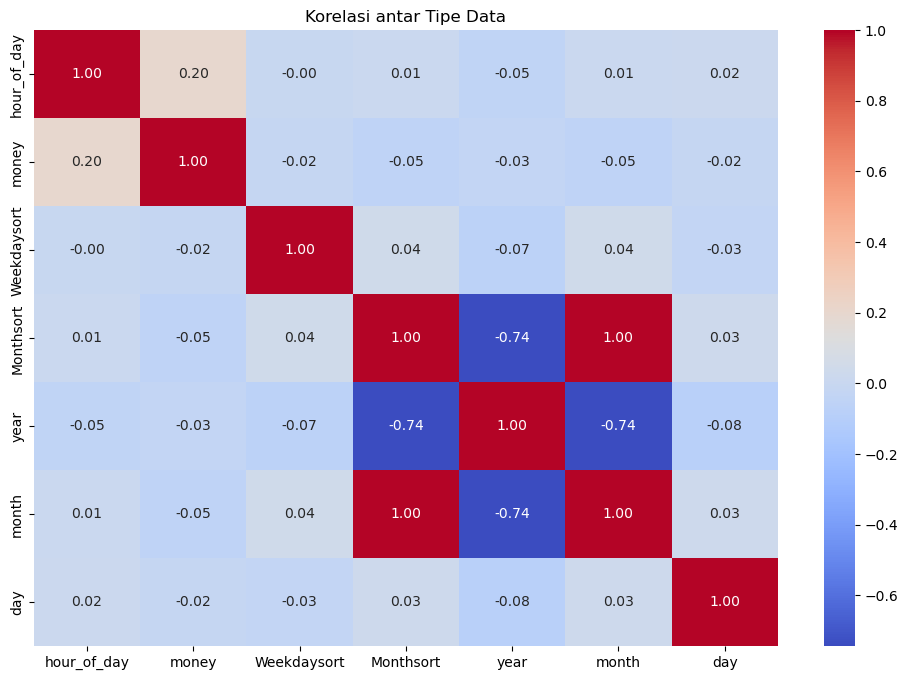

In [18]:
plt.figure(figsize=(12, 8))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f') #.2f ini untuk dibulatkan
plt.title('Korelasi antar Tipe Data')
plt.show()

In [19]:
#1. Menghitung rata-rata penjualan kopi setiap tahun
rata_penjualan = df.groupby(['coffee_name','year'])['money'].mean().reset_index()
rata_penjualan

,coffee_name,year,money
0,Americano,2024,25.987563
1,Americano,2025,25.960000
2,Americano with Milk,2024,30.513839
3,Americano with Milk,2025,30.860000
4,Cappuccino,2024,35.924231
5,Cappuccino,2025,35.760000
6,Cocoa,2024,35.576691
7,Cocoa,2025,35.760000
8,Cortado,2024,25.700474
9,Cortado,2025,25.960000


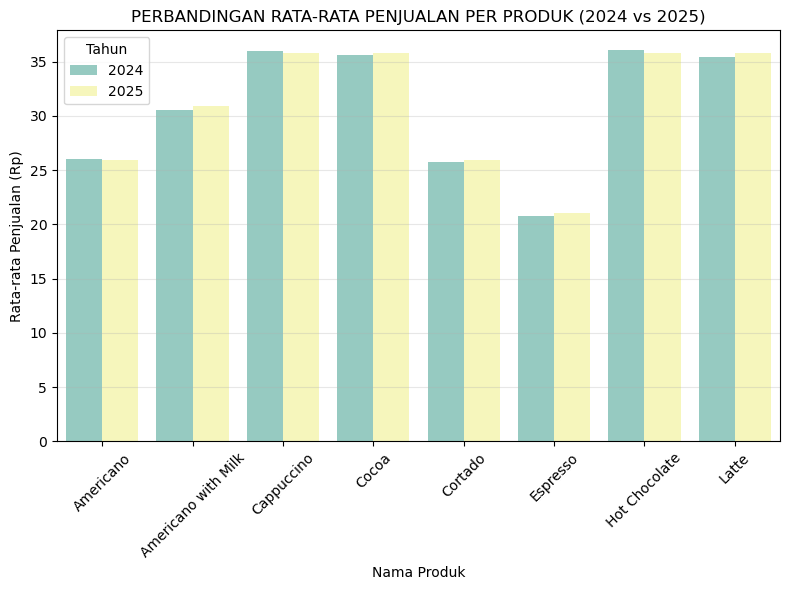

In [20]:
# Bar plot grouped
plt.figure(figsize=(8, 6))
sns.barplot(data=rata_penjualan, 
            x='coffee_name', 
            y='money', 
            hue='year',
            palette='Set3')

plt.title('PERBANDINGAN RATA-RATA PENJUALAN PER PRODUK (2024 vs 2025)')
plt.xlabel('Nama Produk')
plt.ylabel('Rata-rata Penjualan (Rp)')
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Berdasarkan analisis rata-rata penjualan per tahun, terlihat stabilitas harga yang cukup konsisten untuk sebagian besar produk kopi dari tahun 2024 ke 2025. Americano with Milk dan Espresso menunjukkan peningkatan harga rata-rata yang moderat, masing-masing dari Rp 30,51 menjadi Rp 30,86 dan dari Rp 20,79 menjadi Rp 21,06, mengindikasikan strategi penyesuaian harga yang selektif. Sebaliknya, beberapa produk premium seperti Cappuccino, Hot Chocolate, dan Latte justru mengalami penurunan harga rata-rata yang seragam menjadi Rp 35,76, yang mungkin mencerminkan strategi penetapan harga yang lebih kompetitif untuk segmen premium. 

In [21]:
#2. Menghitung jumlah pembayaran berdasarkan Time of Day
rata_penjualan = df.groupby(['Time_of_Day'])['money'].count().reset_index()
rata_penjualan

,Time_of_Day,money
0,Afternoon,1205
1,Morning,1181
2,Night,1161


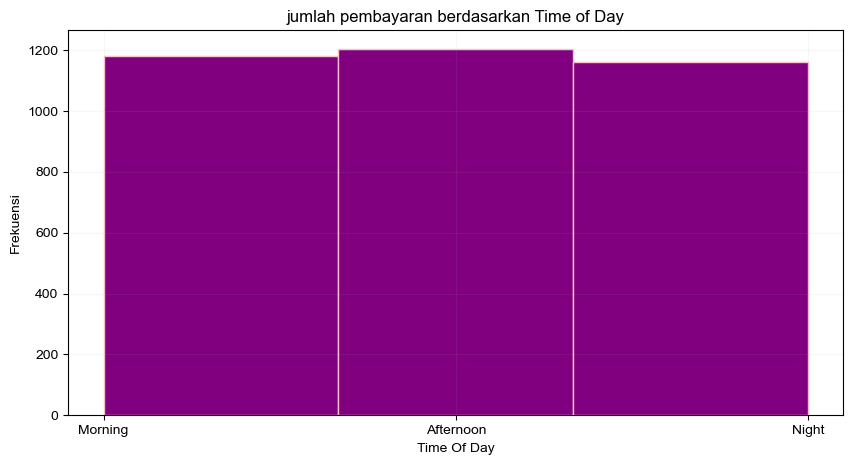

In [22]:
#Histogram 
plt.figure(figsize=(10, 5))
plt.hist(df['Time_of_Day'], bins=3, color= 'purple', edgecolor='pink')
plt.style.use('seaborn-v0_8-darkgrid') #gaya dengan grid lembut
plt.title('jumlah pembayaran berdasarkan Time of Day')
plt.xlabel('Time Of Day')
plt.ylabel('Frekuensi')
plt.grid(alpha=0.1)
plt.show()

Dalam visualisasi data ini afternoon menjadi periode dengan aktivitas transaksi terbanyak, menunjukan kebiasaan pelanggan yang melakukan pembayaran di sore hari. selanjutnya disusul dengan night yang hampir sama dengan transaksi pada Time of Day afternoon. kemudian mengalami penurunan pada pola morning yang mungkin disebabkan oleh jam sibuk kerja/aktivitas sehingga mengurangi waktu transaksi.

In [23]:
#3. Menghitung jumlah pembayaran menggunakan metode apa pada setiap tahunnya
jumlah_pembayaran = df.groupby(['year'])['cash_type'].count().reset_index()
jumlah_pembayaran

,year,cash_type
0,2024,2604
1,2025,943


/var/folders/gm/hpkzcyy966b9qy96gxsz8z7r0000gn/T/ipykernel_1706/3603970682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=jumlah_pembayaran,


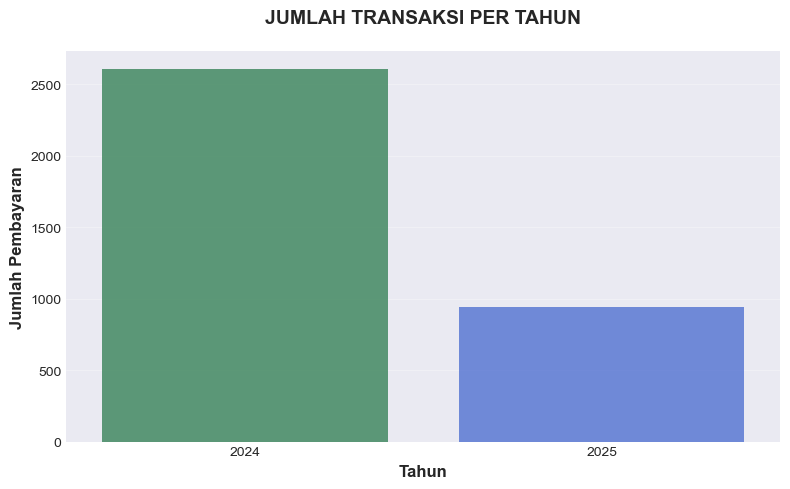

In [24]:
plt.figure(figsize=(8, 5))

# Menggunakan seaborn untuk bar plot
ax = sns.barplot(data=jumlah_pembayaran, 
                 x='year', 
                 y='cash_type',
                 palette=['#2E8B57', '#4169E1'],
                 alpha=0.8,
                 saturation=0.8)


plt.xlabel('Tahun', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Pembayaran', fontsize=12, fontweight='bold')
plt.title('JUMLAH TRANSAKSI PER TAHUN', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Dalam visualisasi data ini terlihat terjadi penurunan secara signifikan, namun hal ini dikarenakan didalam data set yang tersedia memang tidak penuh secara apple to apple. 

In [25]:
#4. Agregasi beberapa statistik sekaligus per menu
#Harganya ada beda beda, ada yang 23/28
deskripsi_penjualan = df.groupby('coffee_name')['money'].agg(['mean', 'min', 'max', 'count']).reset_index()
deskripsi_penjualan

,coffee_name,mean,min,max,count
0,Americano,25.975638,23.02,28.9,564
1,Americano with Milk,30.594710,27.92,33.8,809
2,Cappuccino,35.883004,32.82,38.7,486
3,Cocoa,35.653389,32.82,38.7,239
4,Cortado,25.731220,23.02,28.9,287
5,Espresso,20.854884,18.12,24.0,129
6,Hot Chocolate,35.990797,32.82,38.7,276
7,Latte,35.502378,32.82,38.7,757


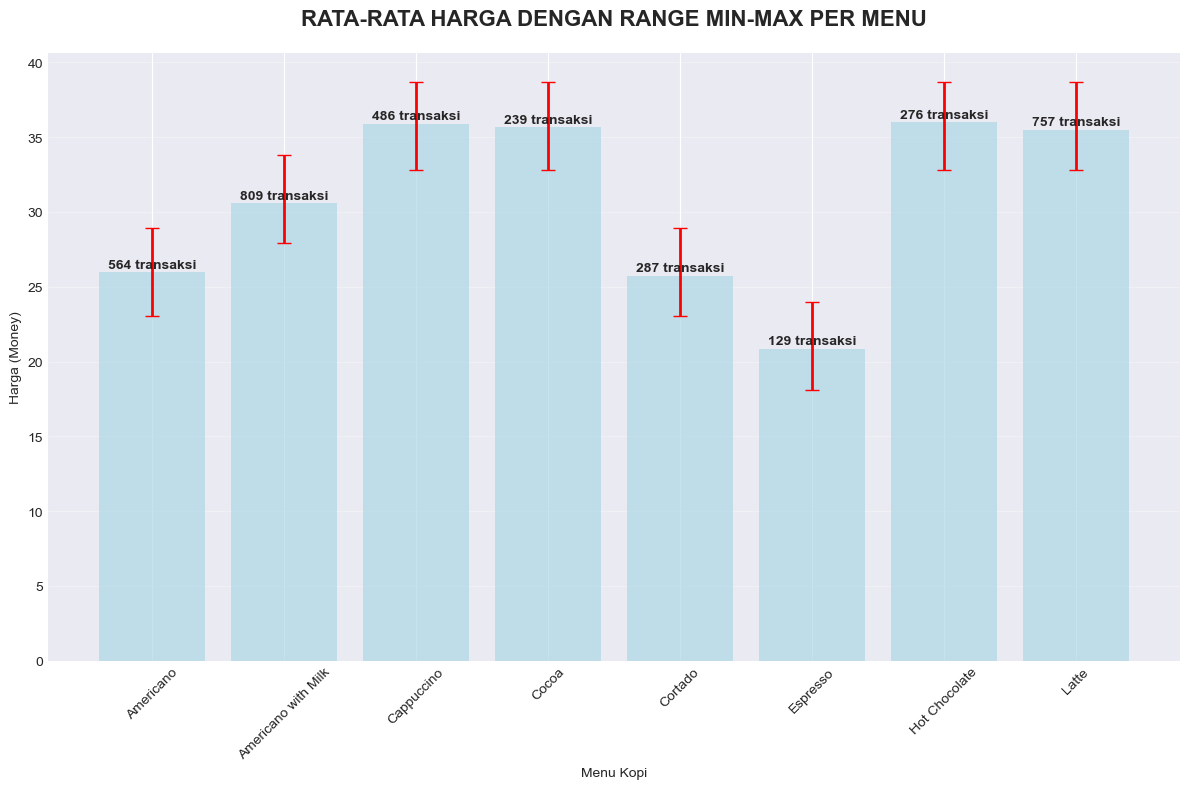

In [26]:
# Bar plot dengan error bars menunjukkan range harga
plt.figure(figsize=(12, 8))

bars = plt.bar(deskripsi_penjualan['coffee_name'], 
               deskripsi_penjualan['mean'],
               yerr=[deskripsi_penjualan['mean'] - deskripsi_penjualan['min'], 
                     deskripsi_penjualan['max'] - deskripsi_penjualan['mean']],
               capsize=5,
               alpha=0.7,
               color='lightblue',
               error_kw={'elinewidth': 2, 'ecolor': 'red'})

plt.title('RATA-RATA HARGA DENGAN RANGE MIN-MAX PER MENU', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Menu Kopi')
plt.ylabel('Harga (Money)')
plt.xticks(rotation=45)

# Tambahkan nilai count di atas bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{deskripsi_penjualan.iloc[i]["count"]} transaksi',
             ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Berdasarkan analisis statistik harga per menu, teridentifikasi tiga segmentasi harga yang jelas dalam data produk kopi. Hot Chocolate mencatat nilai rata-rata tertinggi sebesar  35,99, disusul oleh Cappuccino  35,88 dan Cocoa 35,65 yang membentuk segmen premium dengan rentang harga  32,82-38,70. Di segmen menengah, Americano with Milk berada pada posisi unik dengan harga rata-rata  30,59 dan volume penjualan tertinggi 809 transaksi, menunjukkan optimal positioning sebagai produk premium. Sementara di segmen entry-level, Espresso menjadi produk termurah dengan rata-rata  20,85 namun dengan volume terendah 129 transaksi, mengindikasikan bahwa strategi harga rendah tidak serta merta meningkatkan volume penjualan. 

In [27]:
#5. Menghitung jumlah penjualan permenu pada tahun 2024
tahun_df = df[df['year'] == 2024]

deskripsi_penjualan = tahun_df.groupby(['coffee_name'])['money'].sum().reset_index().sort_values(by='money', ascending=False)
deskripsi_penjualan

,coffee_name,money
7,Latte,21439.78
1,Americano with Milk,18918.58
2,Cappuccino,13076.42
0,Americano,8316.02
6,Hot Chocolate,7430.26
4,Cortado,6502.22
3,Cocoa,4945.16
5,Espresso,2016.36


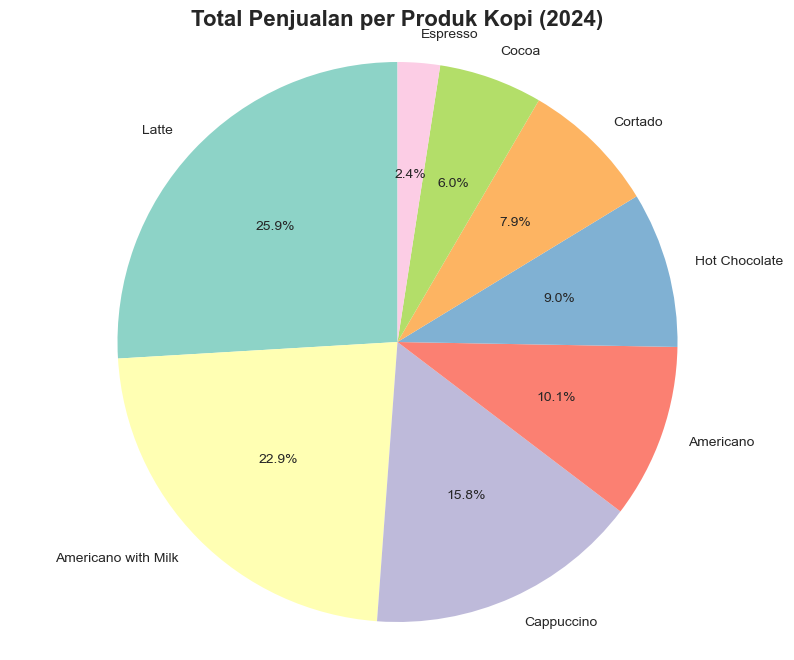

In [38]:
plt.figure(figsize=(10, 8))
plt.pie(deskripsi_penjualan['money'], 
        labels=deskripsi_penjualan['coffee_name'], 
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)

plt.title('Total Penjualan per Produk Kopi (2024)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

Berdasarkan analisis penjualan kopi tahun 2024, Latte menjadi produk unggulan dengan total pendapatan mencapai 21.439,78, menempati posisi teratas dalam kontribusi pendapatan. Americano with Milk mengikuti di peringkat kedua dengan performa yang hampir menyamai Latte sebesar  18.918,58, sementara Cappuccino menempati posisi ketiga dengan 13.076,42. Ketiga produk ini secara kolektif mendominasi portofolio penjualan, menunjukkan preferensi konsumen yang kuat terhadap minuman kopi susu dengan varian yang creamy.
Di sisi lain, produk Espresso mencatatkan penjualan terendah hanya 2.016,36, mengindikasikan bahwa minuman kopi murni tanpa tambahan susu kurang diminati pasar. 

In [30]:
#6. Agg 

kopi_agg = df.groupby('coffee_name').agg(
    jumlah_transaksi=('money', 'count'),
    total_pendapatan=('money', 'sum')
).sort_values('total_pendapatan', ascending=False)

kopi_agg.head()

,jumlah_transaksi,total_pendapatan
coffee_name,,
Latte,757,26875.30
Americano with Milk,809,24751.12
Cappuccino,486,17439.14
Americano,564,14650.26
Hot Chocolate,276,9933.46


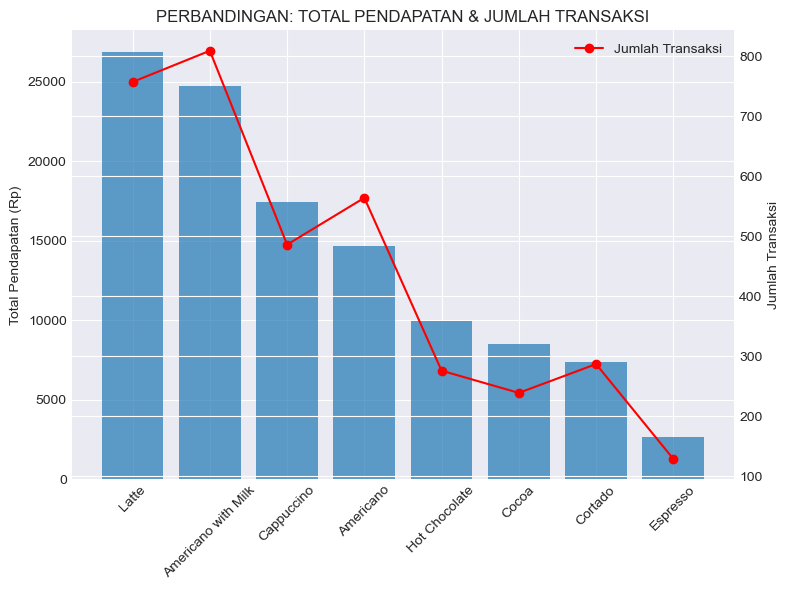

In [31]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot total pendapatan
ax1.bar(kopi_agg.index, kopi_agg['total_pendapatan'], alpha=0.7, label='Total Pendapatan')
ax1.set_ylabel('Total Pendapatan (Rp)')
ax1.tick_params(axis='x', rotation=45)

# Buat axis kedua untuk jumlah transaksi
ax2 = ax1.twinx()
ax2.plot(kopi_agg.index, kopi_agg['jumlah_transaksi'], color='red', marker='o', 
         label='Jumlah Transaksi')
ax2.set_ylabel('Jumlah Transaksi')

plt.title('PERBANDINGAN: TOTAL PENDAPATAN & JUMLAH TRANSAKSI')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/gm/hpkzcyy966b9qy96gxsz8z7r0000gn/T/ipykernel_1706/720574456.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(kopi_agg['jumlah_transaksi'],


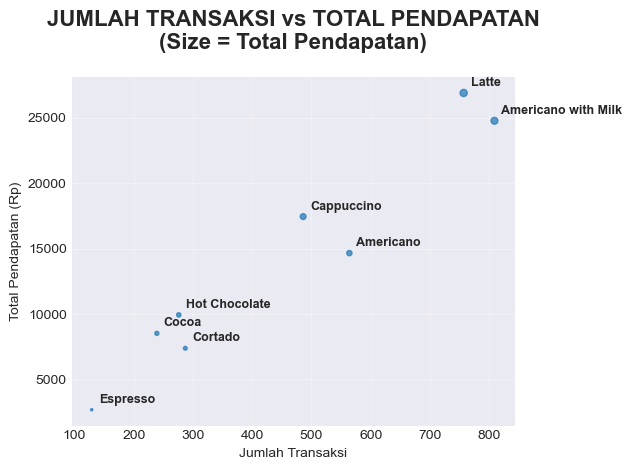

In [32]:
scatter = plt.scatter(kopi_agg['jumlah_transaksi'], 
                      kopi_agg['total_pendapatan'],
                      s=kopi_agg['total_pendapatan']/1000,  # Size berdasarkan total
                      alpha=0.7,
                      cmap='viridis')

plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Pendapatan (Rp)')
plt.title('JUMLAH TRANSAKSI vs TOTAL PENDAPATAN\n(Size = Total Pendapatan)', 
          fontsize=16, fontweight='bold', pad=20)

# Annotasi nama kopi
for idx, row in kopi_agg.iterrows():
    plt.annotate(idx, 
                (row['jumlah_transaksi'], row['total_pendapatan']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Berdasarkan analisis agregat penjualan per jenis kopi, Latte terbukti menjadi champion product dengan kontribusi pendapatan tertinggi sebesar 26.875,30 meskipun dari sisi volume transaksi 757 transaksi berada di peringkat kedua. Yang menarik, Americano with Milk justru mencatatkan jumlah transaksi terbanyak 809 transaksi dengan total pendapatan  24.751,12, mengindikasikan popularitas yang tinggi di kalangan konsumen namun dengan nilai transaksi rata-rata yang lebih rendah dibandingkan Latte. Cappuccino menempati posisi ketiga dengan efisiensi transaksi yang baik, menghasilkan  17.439,14 dari hanya 486 transaksi, yang mencerminkan nilai per transaksi yang lebih tinggi. Pola ini menunjukkan bahwa sementara Americano with Milk lebih sering dibeli, Latte tetap menjadi kontributor pendapatan utama dengan nilai transaksi yang lebih premium, mengungkap strategi pricing dan preferensi konsumen yang berbeda untuk setiap varian produk.

In [33]:
#7. Produk dengan transaksi terbanyak

produk_populer = df.groupby('coffee_name').agg(
    frekuensi_transaksi=('money', 'count'),
    total_penjualan=('money', 'sum'),
    avg_transaksi=('money', 'mean')
).sort_values('frekuensi_transaksi', ascending=False).reset_index()

produk_populer.head()

,coffee_name,frekuensi_transaksi,total_penjualan,avg_transaksi
0,Americano with Milk,809,24751.12,30.594710
1,Latte,757,26875.30,35.502378
2,Americano,564,14650.26,25.975638
3,Cappuccino,486,17439.14,35.883004
4,Cortado,287,7384.86,25.731220


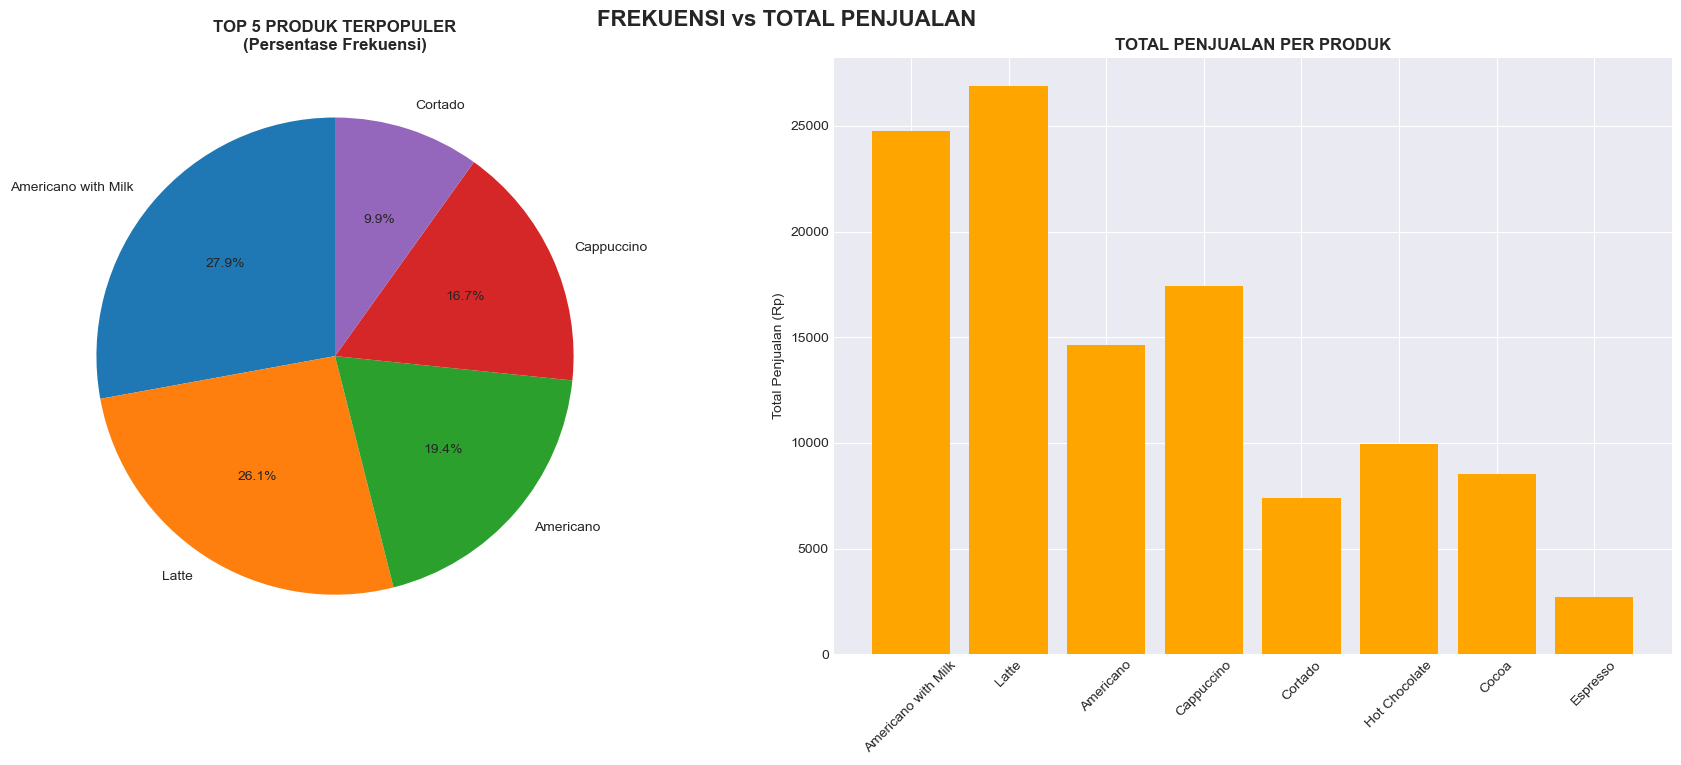

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart untuk persentase frekuensi
top_5 = produk_populer.head(5)
ax1.pie(top_5['frekuensi_transaksi'], 
        labels=top_5['coffee_name'], 
        autopct='%1.1f%%',
        startangle=90)
ax1.set_title('TOP 5 PRODUK TERPOPULER\n(Persentase Frekuensi)', fontweight='bold')

# Bar plot untuk total penjualan
bars = ax2.bar(produk_populer['coffee_name'], produk_populer['total_penjualan'], color='orange')
ax2.set_title('TOTAL PENJUALAN PER PRODUK', fontweight='bold')
ax2.set_ylabel('Total Penjualan (Rp)')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('FREKUENSI vs TOTAL PENJUALAN', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

Berdasarkan analisis popularitas produk kopi, Americano with Milk mencatatkan frekuensi transaksi tertinggi 809 kali meskipun hanya menempati peringkat kedua dalam total penjualan, menunjukkan posisinya sebagai produk paling populer dan frequently purchased di kalangan konsumen. Namun yang menarik, Latte justru menjadi pemimpin pendapatan dengan total penjualan tertinggi 26.875,30 didorong oleh nilai transaksi rata-rata yang cukup tinggi  35,50. Cappuccino menonjol dengan nilai transaksi rata-rata tertinggi 35,88, mengindikasikan positioning sebagai produk premium dengan profitabilitas yang baik per transaksi. Sementara Americano dan Cortado memiliki nilai transaksi rata-rata terendah sekitar Rp 25-26, mencerminkan positioning sebagai entry-level products.

In [35]:
#8. Frekuensi vs Total Penjualan
df = df.groupby('coffee_name').agg(
    total_penjualan=('money', 'sum'),
    frekuensi_transaksi=('money', 'count'),
    rata_rata_transaksi=('money', 'mean'),
    tahun_aktif=('year', 'nunique')
).reset_index()

df.head()

,coffee_name,total_penjualan,frekuensi_transaksi,rata_rata_transaksi,tahun_aktif
0,Americano,14650.26,564,25.975638,2
1,Americano with Milk,24751.12,809,30.594710,2
2,Cappuccino,17439.14,486,35.883004,2
3,Cocoa,8521.16,239,35.653389,2
4,Cortado,7384.86,287,25.731220,2


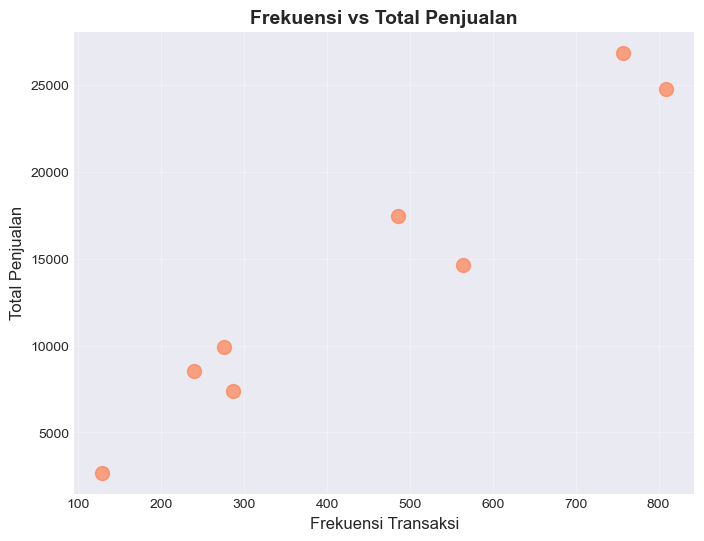

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['frekuensi_transaksi'], df['total_penjualan'], 
            s=100, alpha=0.7, color='coral')

plt.title('Frekuensi vs Total Penjualan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Transaksi', fontsize=12)
plt.ylabel('Total Penjualan', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Berdasarkan analisis performa produk, Americano with Milk unggul sebagai produk terpopuler dengan frekuensi transaksi tertinggi 809 kali dan total penjualan terbesar kedua 24.751. Namun, Cappuccino menjadi produk paling premium dengan nilai transaksi rata-rata tertinggi 35.88, diikuti Cocoa 35.65. Produk entry-level seperti Americano dan Cortado memiliki harga termurah sekitar  26 dengan volume penjualan menengah. Semua produk konsisten terjual selama 2 tahun, menunjukkan stabilitas permintaan.

<Figure size 600x400 with 0 Axes>

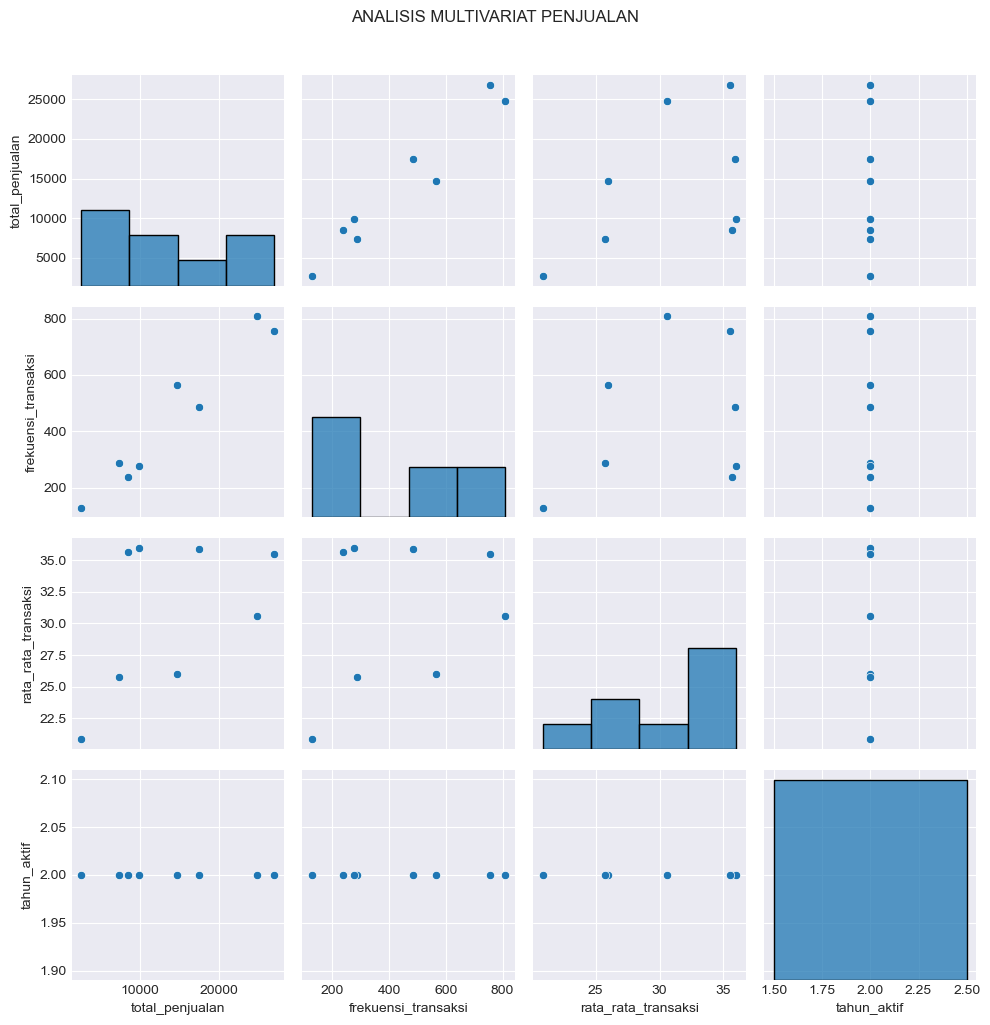

In [37]:
plt.figure(figsize=(6, 4))
sns.pairplot(df[['total_penjualan', 'frekuensi_transaksi', 'rata_rata_transaksi', 'tahun_aktif']])
plt.suptitle('ANALISIS MULTIVARIAT PENJUALAN', y=1.02)
plt.tight_layout()
plt.show()